<a href="https://colab.research.google.com/github/Tansarraf/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Zomato dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv("/Zomato-data.csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Converting the ```rate``` column to float by removing the denominator characters.






In [6]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)


Creating new columns ```cost_per_person``` and ```is_expensive``` to find the cost per person and whether the restaurant is expensive.

In [7]:
df['cost_per_person'] = df['approx_cost(for two people)'] / 2
df['is_expensive'] = (df['cost_per_person'] > 400).astype(bool)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    float64
 6   listed_in(type)              148 non-null    object 
 7   cost_per_person              148 non-null    float64
 8   is_expensive                 148 non-null    bool   
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),cost_per_person,is_expensive
0,Jalsa,Yes,Yes,4.1,775,800.0,Buffet,400.0,False
1,Spice Elephant,Yes,No,4.1,787,800.0,Buffet,400.0,False
2,San Churro Cafe,Yes,No,3.8,918,800.0,Buffet,400.0,False
3,Addhuri Udupi Bhojana,No,No,3.7,88,300.0,Buffet,150.0,False
4,Grand Village,No,No,3.8,166,600.0,Buffet,300.0,False


In [10]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0
cost_per_person,0
is_expensive,0


**1) Identifying Popular Restaurant Categories**

Text(0.5, 0, 'Types of restaurant')

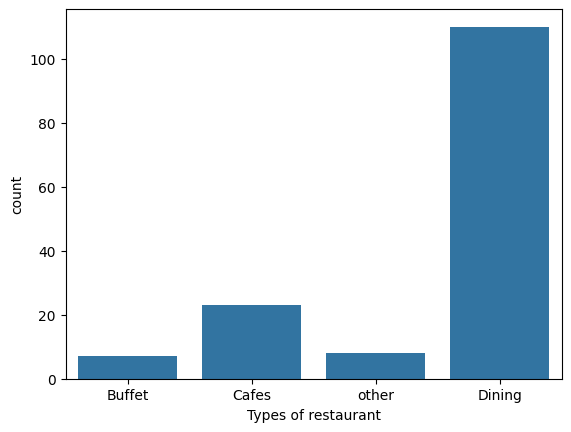

In [11]:
sb.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of restaurant")

**Observation :** Majority restaurants fall under the *Dining* category.

**2) Votes By Restaurant Type**

Text(0, 0.5, 'Votes')

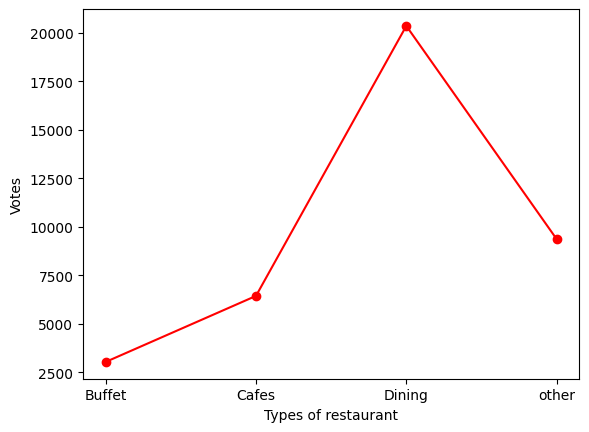

In [12]:
group = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group})
plt.plot(result, c = 'red', marker = 'o')
plt.xlabel('Types of restaurant')
plt.ylabel('Votes')

**Observation :** Dining restaurants are preferred by a large number of individuals.

**3) Most Voted Restaurant**

In [13]:
max_votes = df['votes'].max()
restaurant_max_votes = df.loc[df['votes'] == max_votes,'name']

print('Restaurnt(s) with maximum votes :')
print(restaurant_max_votes)

Restaurnt(s) with maximum votes :
38    Empire Restaurant
Name: name, dtype: object


**4) Least Voted Restaurant**

In [14]:
min_votes = df['votes'].min()
restaurant_min_votes = df.loc[df['votes'] == min_votes,'name']

print('Restaurnt(s) with minimum votes :')
print(restaurant_min_votes)

Restaurnt(s) with minimum votes :
72                         Spicy Tandoor
75                 Om Sri Vinayaka Chats
84                             Chill Out
90                        Me And My Cake
91                               Sunsadm
92                Annapooraneshwari Mess
107                        Coffee Shopee
110                  Hari Super Sandwich
113     Dharwad Line Bazaar Mishra Pedha
114                            Cake Bite
115                  Aarush's Food Plaza
116                           Wood Stove
117                         Kulfi & More
118                  Kannadigas Karavali
125                 Soms Kitchen & Bakes
126              Banashankari Nati Style
128                    Mohitesh Hut Roll
129    Sri Basaveshwar Jolada Rotti Oota
130                 Roll Magic Fast Food
131            Foodlieious Multi Cuisine
132    Thanishka Nati And Karavali Style
133                    Swathi Cool Point
134                      Kaumudis Juoice
135                    

**5) Online Order Availability**

<Axes: xlabel='online_order', ylabel='count'>

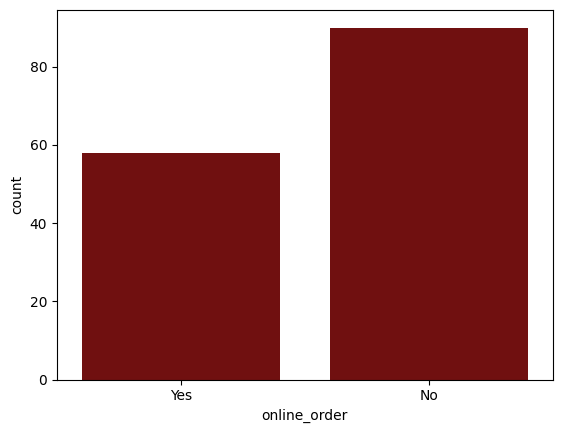

In [15]:
sb.countplot(x = df['online_order'], color = 'maroon')

**Observation :** Majority of the restaurants do no accept online orders.

**6) Analyzing the Ratings**

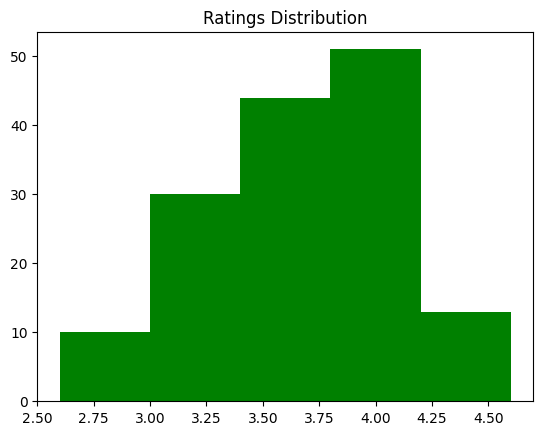

In [16]:
plt.hist(df['rate'], bins = 5, color = 'green')
plt.title('Ratings Distribution')
plt.show()

**Observation :** Majority of the restaurants received ratings ranging from 3.5 to 4

**7) Expensive vs Budget Friendly**

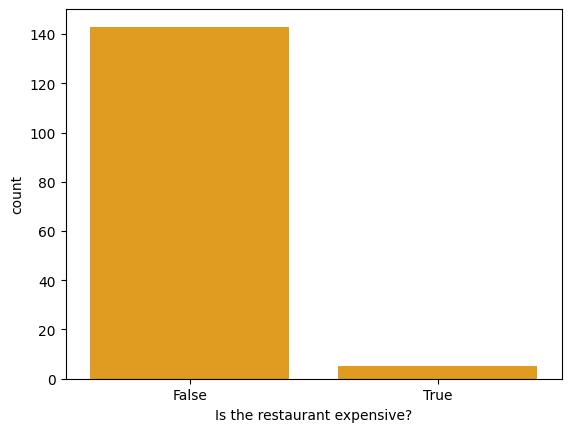

In [17]:
sb.countplot(x = df['is_expensive'], color = 'orange')
plt.xlabel('Is the restaurant expensive?')
plt.show()

**Observation :** This suggests that only a few restaurants are expensive.

**8) Approximate Cost for Couples**

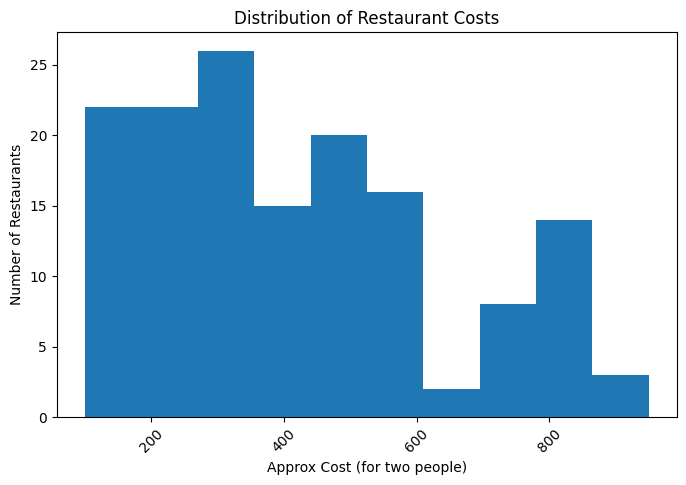

In [18]:
plt.figure(figsize=(8,5))
plt.hist(df['approx_cost(for two people)'], bins=10)
plt.xlabel("Approx Cost (for two people)")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Costs")
plt.xticks(rotation=45)
plt.show()


**Observation :** The majority of couples prefer restaurants with an approximate cost of 300 rupees.

**9) Ratings Comparison - Online vs Offline Orders**

<Axes: xlabel='online_order', ylabel='rate'>

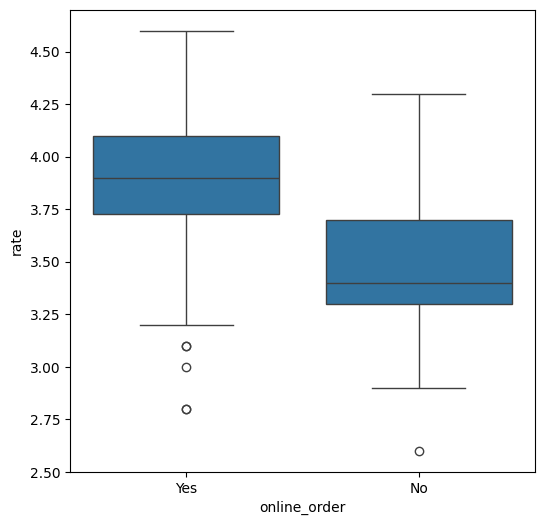

In [19]:
plt.figure(figsize=(6,6))
sb.boxplot(x='online_order',y='rate',data=df)

**Observation :** Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

**10) Order Mode Preferences by Restaurant Type**

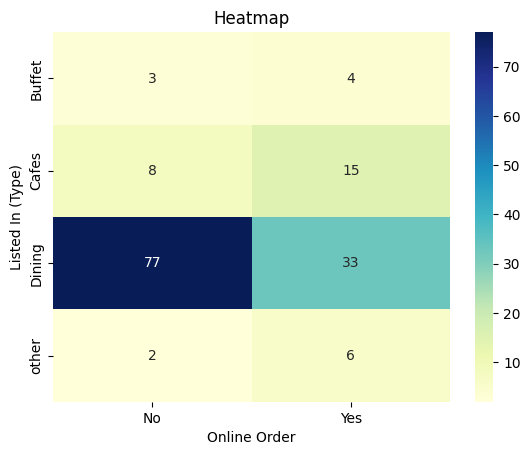

In [20]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sb.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()